In [39]:
%load_ext nb_black

<IPython.core.display.Javascript object>

# Collecting data

In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spotipy
import os
import spotipy
import pandas as pd
from tqdm import tqdm
from spotipy.oauth2 import SpotifyClientCredentials

%matplotlib inline

<IPython.core.display.Javascript object>

In [184]:
from spotipy.oauth2 import SpotifyClientCredentials

cid = "b9ff596f8afd419ab00f96c0e3ff1aff"
secret = "fcc60a813705409090478d22581c726e"
client_credentials_manager = SpotifyClientCredentials(
    client_id=cid, client_secret=secret
)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

<IPython.core.display.Javascript object>

In [194]:
artist_name = []
track_name = []
popularity = []
track_id = []
release_date = []
for year in range(2000, 2024):
    for i in range(0, 1000, 50):
        track_results = sp.search(
            q="genre:pop; year:" + str(year),
            type="track",
            limit=50,
            offset=i,
            market="US",
        )
        for index, t in enumerate(track_results["tracks"]["items"]):
            artist_name.append(t["artists"][0]["name"])
            track_name.append(t["name"])
            track_id.append(t["id"])
            popularity.append(t["popularity"])
            release_date.append(t["album"]["release_date"])

<IPython.core.display.Javascript object>

In [195]:
track_results

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=genre%3Apop%3B+year%3A2023&type=track&market=US&offset=950&limit=50',
  'items': [{'album': {'album_group': 'compilation',
     'album_type': 'compilation',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/0LyfQWJT6nXafLPZqxe9Of'},
       'href': 'https://api.spotify.com/v1/artists/0LyfQWJT6nXafLPZqxe9Of',
       'id': '0LyfQWJT6nXafLPZqxe9Of',
       'name': 'Various Artists',
       'type': 'artist',
       'uri': 'spotify:artist:0LyfQWJT6nXafLPZqxe9Of'}],
     'external_urls': {'spotify': 'https://open.spotify.com/album/0VD61nHAGhAe6lj9Rmb6wK'},
     'href': 'https://api.spotify.com/v1/albums/0VD61nHAGhAe6lj9Rmb6wK',
     'id': '0VD61nHAGhAe6lj9Rmb6wK',
     'images': [{'height': 640,
       'url': 'https://i.scdn.co/image/ab67616d0000b273e0518cddc02f3815bba67a61',
       'width': 640},
      {'height': 300,
       'url': 'https://i.scdn.co/image/ab67616d00001e02e0518cddc02f3815bba67a61',
   

<IPython.core.display.Javascript object>

In [198]:
len(set(track_id))

23987

<IPython.core.display.Javascript object>

In [199]:
track_dataframe = pd.DataFrame(
    {
        "artist_name": artist_name,
        "track_name": track_name,
        "track_id": track_id,
        "popularity": popularity,
        "release_date": release_date,
    }
)
print(track_dataframe.shape)
track_dataframe.head()

(24000, 5)


,artist_name,track_name,track_id,popularity,release_date
0,Coldplay,Yellow,3AJwUDP919kvQ9QcozQPxg,86,2000-07-10
1,3 Doors Down,Kryptonite,6ZOBP3NvffbU4SZcrnt1k6,77,2000
2,Outkast,Ms. Jackson,0I3q5fE6wg7LIfHGngUTnV,79,2000-10-31
3,Shaggy,It Wasn't Me,3WkibOpDF7cQ5xntM1epyf,76,2000-08-08
4,Nelly,Ride Wit Me,3Gf5nttwcX9aaSQXRWidEZ,73,2000-06-27


<IPython.core.display.Javascript object>

In [200]:
track_dataframe.sample(5)

,artist_name,track_name,track_id,popularity,release_date
19543,Ariana Grande,make up,27356GVuMPFWiJSZCragoM,61,2019-02-08
1203,Mr. Cheeks,"Lights, Camera, Action!",36gOOIQaBwXZVKL5z2vC3Z,45,2001-01-01
9200,Lady Gaga,LoveGame,5iHDEI2GIsx3YEa9OXPtRJ,54,2009-11-05
17249,Beach Fossils,Down the Line,05ZUxHiGT7VR6ShJjhwJxn,64,2017-06-02
6840,Take That,Patience,0v0EZLRftWKqvFfwurjw02,38,2006-01-01


<IPython.core.display.Javascript object>

In [203]:
features_df = pd.DataFrame()
for i in tqdm(track_id):
    features_i = sp.audio_features(tracks=[i])
    features_df_i = pd.DataFrame(features_i)
    features_df = pd.concat([features_df, features_df_i])

100%|█████████████████████████████████████| 24000/24000 [36:56<00:00, 10.83it/s]


<IPython.core.display.Javascript object>

In [204]:
features_df.reset_index(inplace=True)

<IPython.core.display.Javascript object>

In [205]:
features_df.sample(5)

,index,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
16515,0,0.619,0.856,4,-5.761,1,0.0424,0.513000,0.000005,0.124,0.542,120.028,audio_features,03PTvKwCBFNGxIqvzVWHwg,spotify:track:03PTvKwCBFNGxIqvzVWHwg,https://api.spotify.com/v1/tracks/03PTvKwCBFNG...,https://api.spotify.com/v1/audio-analysis/03PT...,189015,4
5185,0,0.459,0.565,8,-5.537,1,0.0274,0.773000,0.000000,0.135,0.149,145.988,audio_features,4JY5s40ymnG18f6wxQtzPw,spotify:track:4JY5s40ymnG18f6wxQtzPw,https://api.spotify.com/v1/tracks/4JY5s40ymnG1...,https://api.spotify.com/v1/audio-analysis/4JY5...,254320,4
23185,0,0.693,0.643,4,-5.867,0,0.0828,0.138000,0.000000,0.108,0.477,95.055,audio_features,3PXaV1mMx4Yff79iQivEkQ,spotify:track:3PXaV1mMx4Yff79iQivEkQ,https://api.spotify.com/v1/tracks/3PXaV1mMx4Yf...,https://api.spotify.com/v1/audio-analysis/3PXa...,163450,4
21982,0,0.549,0.643,9,-6.808,1,0.0543,0.079200,0.000012,0.107,0.123,174.041,audio_features,6btdl1Vl6Ta5lUwUSOFW2H,spotify:track:6btdl1Vl6Ta5lUwUSOFW2H,https://api.spotify.com/v1/tracks/6btdl1Vl6Ta5...,https://api.spotify.com/v1/audio-analysis/6btd...,168034,4
3756,0,0.212,0.962,2,-3.615,1,0.0881,0.000963,0.000214,0.216,0.472,173.125,audio_features,0ir4rLQH0Ye3yCpWDFL1J7,spotify:track:0ir4rLQH0Ye3yCpWDFL1J7,https://api.spotify.com/v1/tracks/0ir4rLQH0Ye3...,https://api.spotify.com/v1/audio-analysis/0ir4...,198720,4


<IPython.core.display.Javascript object>

In [206]:
concat_df = pd.concat([track_dataframe, features_df], axis=1)

<IPython.core.display.Javascript object>

In [207]:
concat_df

,artist_name,track_name,track_id,popularity,release_date,index,danceability,energy,key,loudness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Coldplay,Yellow,3AJwUDP919kvQ9QcozQPxg,86,2000-07-10,0,0.429,0.661,11,-7.227,...,0.2340,0.285,173.372,audio_features,3AJwUDP919kvQ9QcozQPxg,spotify:track:3AJwUDP919kvQ9QcozQPxg,https://api.spotify.com/v1/tracks/3AJwUDP919kv...,https://api.spotify.com/v1/audio-analysis/3AJw...,266773,4
1,3 Doors Down,Kryptonite,6ZOBP3NvffbU4SZcrnt1k6,77,2000,0,0.545,0.865,11,-5.708,...,0.1680,0.543,99.009,audio_features,6ZOBP3NvffbU4SZcrnt1k6,spotify:track:6ZOBP3NvffbU4SZcrnt1k6,https://api.spotify.com/v1/tracks/6ZOBP3NvffbU...,https://api.spotify.com/v1/audio-analysis/6ZOB...,233933,4
2,Outkast,Ms. Jackson,0I3q5fE6wg7LIfHGngUTnV,79,2000-10-31,0,0.843,0.806,4,-5.946,...,0.0771,0.613,94.948,audio_features,0I3q5fE6wg7LIfHGngUTnV,spotify:track:0I3q5fE6wg7LIfHGngUTnV,https://api.spotify.com/v1/tracks/0I3q5fE6wg7L...,https://api.spotify.com/v1/audio-analysis/0I3q...,270507,4
3,Shaggy,It Wasn't Me,3WkibOpDF7cQ5xntM1epyf,76,2000-08-08,0,0.853,0.606,0,-4.596,...,0.3130,0.654,94.759,audio_features,3WkibOpDF7cQ5xntM1epyf,spotify:track:3WkibOpDF7cQ5xntM1epyf,https://api.spotify.com/v1/tracks/3WkibOpDF7cQ...,https://api.spotify.com/v1/audio-analysis/3Wki...,227600,4
4,Nelly,Ride Wit Me,3Gf5nttwcX9aaSQXRWidEZ,73,2000-06-27,0,0.850,0.700,7,-6.490,...,0.2440,0.722,101.875,audio_features,3Gf5nttwcX9aaSQXRWidEZ,spotify:track:3Gf5nttwcX9aaSQXRWidEZ,https://api.spotify.com/v1/tracks/3Gf5nttwcX9a...,https://api.spotify.com/v1/audio-analysis/3Gf5...,291782,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,Marshmello,Project Dreams,3DPbTfkp7fVKpkad2aJOyV,0,2023-03-10,0,0.780,0.827,8,-2.235,...,0.1040,0.787,160.106,audio_features,3DPbTfkp7fVKpkad2aJOyV,spotify:track:3DPbTfkp7fVKpkad2aJOyV,https://api.spotify.com/v1/tracks/3DPbTfkp7fVK...,https://api.spotify.com/v1/audio-analysis/3DPb...,167898,4
23996,Måneskin,BABY SAID,2KReCz1L5XkGIBhDncQ5VZ,77,2023-01-20,0,0.622,0.715,6,-4.040,...,0.0796,0.607,131.012,audio_features,2KReCz1L5XkGIBhDncQ5VZ,spotify:track:2KReCz1L5XkGIBhDncQ5VZ,https://api.spotify.com/v1/tracks/2KReCz1L5XkG...,https://api.spotify.com/v1/audio-analysis/2KRe...,164682,4
23997,Olivia Rodrigo,enough for you,6t8UTLZwfjtyuIfPV17jAv,0,2023-03-09,0,0.638,0.259,7,-10.706,...,0.2190,0.269,88.485,audio_features,6t8UTLZwfjtyuIfPV17jAv,spotify:track:6t8UTLZwfjtyuIfPV17jAv,https://api.spotify.com/v1/tracks/6t8UTLZwfjty...,https://api.spotify.com/v1/audio-analysis/6t8U...,202827,4
23998,Olivia Rodrigo,hope ur ok,6nLQaKXJKjNpl2RWie3PpG,0,2023-03-06,0,0.443,0.298,0,-12.181,...,0.1030,0.172,77.253,audio_features,6nLQaKXJKjNpl2RWie3PpG,spotify:track:6nLQaKXJKjNpl2RWie3PpG,https://api.spotify.com/v1/tracks/6nLQaKXJKjNp...,https://api.spotify.com/v1/audio-analysis/6nLQ...,209560,4


<IPython.core.display.Javascript object>

In [208]:
concat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       24000 non-null  object 
 1   track_name        24000 non-null  object 
 2   track_id          24000 non-null  object 
 3   popularity        24000 non-null  int64  
 4   release_date      24000 non-null  object 
 5   index             24000 non-null  int64  
 6   danceability      24000 non-null  float64
 7   energy            24000 non-null  float64
 8   key               24000 non-null  int64  
 9   loudness          24000 non-null  float64
 10  mode              24000 non-null  int64  
 11  speechiness       24000 non-null  float64
 12  acousticness      24000 non-null  float64
 13  instrumentalness  24000 non-null  float64
 14  liveness          24000 non-null  float64
 15  valence           24000 non-null  float64
 16  tempo             24000 non-null  float6

<IPython.core.display.Javascript object>

In [209]:
concat_df.to_csv("spotify_pop_music.csv", index=False)

<IPython.core.display.Javascript object>

In [210]:
concat_df.columns

Index(['artist_name', 'track_name', 'track_id', 'popularity', 'release_date',
       'index', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url',
       'duration_ms', 'time_signature'],
      dtype='object')

<IPython.core.display.Javascript object>

In [211]:
concat_df.sample(5).iloc[:, [0, 1, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]]

,artist_name,track_name,popularity,index,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence
11017,Lady Gaga,Judas,69,0,0.661,0.937,10,-3.830,0,0.0744,0.000967,0.000016,0.355,0.535
8219,2 Pistols,She Got It,51,0,0.530,0.745,10,-6.190,0,0.1060,0.004360,0.000000,0.345,0.269
21304,NF,PAID MY DUES,64,0,0.812,0.784,2,-4.208,1,0.2490,0.136000,0.000000,0.109,0.381
1944,Diana Krall,I Remember You,42,0,0.672,0.353,10,-14.674,1,0.0272,0.580000,0.151000,0.124,0.668
19142,Duncan Laurence,Arcade,76,0,0.450,0.329,9,-12.603,0,0.0441,0.818000,0.001090,0.135,0.266


<IPython.core.display.Javascript object>

# Read from CSV

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
music_df = pd.read_csv(r"spotify_pop_music.csv")

In [4]:
music_df.drop_duplicates(inplace=True)

In [5]:
music_df["release_date"] = pd.to_datetime(music_df["release_date"])

In [6]:
music_df.columns

Index(['artist_name', 'track_name', 'track_id', 'popularity', 'release_date',
       'index', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url',
       'duration_ms', 'time_signature'],
      dtype='object')

In [7]:
music_features_df = music_df[
    [
        "danceability",
        "energy",
        "speechiness",
        "acousticness",
        "instrumentalness",
        "liveness",
        "valence",
    ]
]

In [40]:
music_features_columns = [
    "danceability",
    "energy",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
]

<IPython.core.display.Javascript object>

In [8]:
music_features_df.fillna(0, inplace=True)

/Users/zhhang/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [9]:
music_features_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23987 entries, 0 to 23999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      23987 non-null  float64
 1   energy            23987 non-null  float64
 2   speechiness       23987 non-null  float64
 3   acousticness      23987 non-null  float64
 4   instrumentalness  23987 non-null  float64
 5   liveness          23987 non-null  float64
 6   valence           23987 non-null  float64
dtypes: float64(7)
memory usage: 1.5 MB


In [10]:
music_features_np = music_features_df.to_numpy()
music_features_np

array([[4.29e-01, 6.61e-01, 2.81e-02, ..., 1.21e-04, 2.34e-01, 2.85e-01],
       [5.45e-01, 8.65e-01, 2.86e-02, ..., 1.10e-05, 1.68e-01, 5.43e-01],
       [8.43e-01, 8.06e-01, 2.69e-01, ..., 0.00e+00, 7.71e-02, 6.13e-01],
       ...,
       [6.38e-01, 2.59e-01, 8.98e-02, ..., 0.00e+00, 2.19e-01, 2.69e-01],
       [4.43e-01, 2.98e-01, 6.44e-02, ..., 1.00e-05, 1.03e-01, 1.72e-01],
       [5.56e-01, 6.61e-01, 2.04e-01, ..., 0.00e+00, 1.01e-01, 6.68e-01]])

# PCA+Kmeans

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
music_features_np = scaler.fit_transform(music_features_np)

<IPython.core.display.Javascript object>

## elbow plot

In [51]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    model = KMeans(n_clusters=i)
    model.fit(music_features_np)
    wcss.append(model.inertia_)

#     kmeanModel = KMeans(n_clusters=i)
#     kmeanModel.fit(data)
#     distortions.append(kmeanModel.inertia_)

<IPython.core.display.Javascript object>

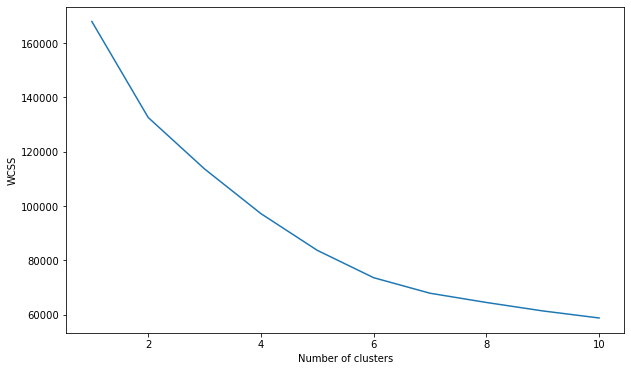

<IPython.core.display.Javascript object>

In [52]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

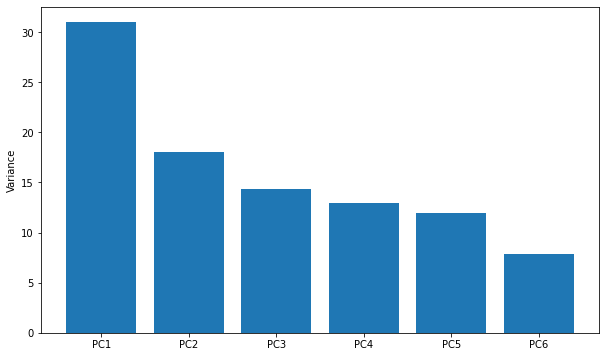

<IPython.core.display.Javascript object>

In [53]:
from sklearn.decomposition import PCA

pca = PCA(6)
pca_data = pca.fit_transform(music_features_np)

plt.figure(figsize=(10, 6))
var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
lbls = ["PC" + str(x) for x in range(1, len(var) + 1)]
plt.bar(x=range(1, len(var) + 1), height=var, tick_label=lbls)
plt.ylabel("Variance")
plt.show()

In [54]:
pca_components_np = pca.components_

<IPython.core.display.Javascript object>

In [55]:
pca_components_np

array([[-0.31531731, -0.54159552, -0.24118803,  0.5140574 ,  0.24210345,
        -0.13497698, -0.45605892],
       [-0.63067128,  0.35692543, -0.14105613, -0.3166843 ,  0.16527981,
         0.47270157, -0.32234765],
       [ 0.02424062, -0.22038819,  0.68662292,  0.21172717, -0.34472741,
         0.51870758, -0.21602653],
       [ 0.18682969,  0.00234502,  0.2904543 ,  0.09651391,  0.87552329,
         0.24054808,  0.21680896],
       [-0.20125731,  0.11828943,  0.57531446, -0.26298713,  0.14061651,
        -0.64163655, -0.33746657],
       [-0.60058089,  0.16164843,  0.18332495,  0.4332555 , -0.09384582,
        -0.13344455,  0.6043505 ]])

<IPython.core.display.Javascript object>

## 2D scatter plot + clusters

[4 2 0 ... 1 1 5]


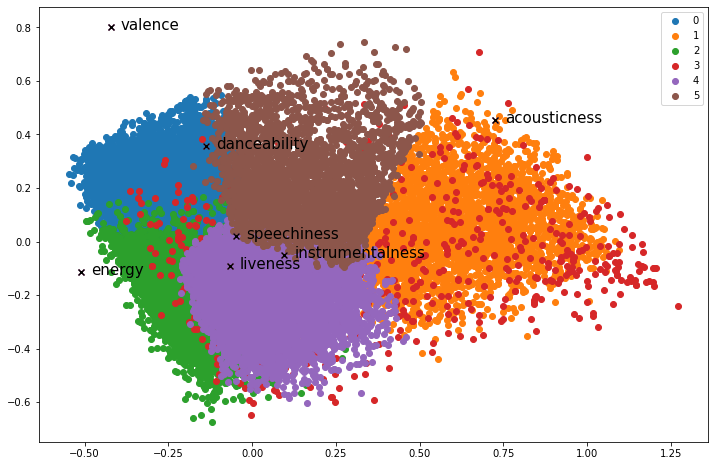

<IPython.core.display.Javascript object>

In [122]:
model = KMeans(n_clusters=6, random_state=42, init="k-means++")
label = model.fit_predict(music_features_df)
data = pca.fit_transform(music_features_df)
print(label)


plt.figure(figsize=(12, 8))
uniq = np.unique(label)
for i in uniq:
    plt.scatter(data[label == i, 0], data[label == i, 1], label=i)

pca_components_np = pca.components_
pca_component1_np = pca_components_np[0]
pca_component2_np = pca_components_np[1]
pca_component3_np = pca_components_np[2]
plt.scatter(pca_component1_np, pca_component2_np, marker="x")

music_features_list = music_features_df.columns
for i in range(len(music_features_list)):
    plt.scatter(pca_component1_np[i], pca_component2_np[i], marker="x", color="black")
    plt.text(
        pca_component1_np[i] + 0.03,
        pca_component2_np[i] - 0.01,
        music_features_list[i],
        fontsize=15,
    )
# fig, ax = plt.subplots()
# for i, txt in enumerate(music_features_df):
#     ax.annotate(txt, (pca_component1_np[i], pca_component2_np[i]))

plt.legend()
plt.show()

In [118]:
music_df["label"] = label
music_df[music_df["label"] == 0].sample(10)

,artist_name,track_name,track_id,popularity,release_date,index,danceability,energy,key,loudness,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,year,label
9292,Alejandro Fernández,No Lo Beses,3cX7KNREYC4NBntB6ccHHt,62,2009-01-01,0,0.552,0.480,1,-6.925,...,139.735,audio_features,3cX7KNREYC4NBntB6ccHHt,spotify:track:3cX7KNREYC4NBntB6ccHHt,https://api.spotify.com/v1/tracks/3cX7KNREYC4N...,https://api.spotify.com/v1/audio-analysis/3cX7...,214893,4,2009,0
18666,RINI,My Favourite Clothes,2ZwIO3ufWLFYxtEoam9ydu,66,2018-01-06,0,0.746,0.339,2,-9.041,...,119.924,audio_features,2ZwIO3ufWLFYxtEoam9ydu,spotify:track:2ZwIO3ufWLFYxtEoam9ydu,https://api.spotify.com/v1/tracks/2ZwIO3ufWLFY...,https://api.spotify.com/v1/audio-analysis/2ZwI...,257000,4,2018,0
4112,Ray LaMontagne,Trouble,5aGkIyzLVYGuLIHkxpNAFF,56,2004-08-15,0,0.325,0.424,7,-12.733,...,173.352,audio_features,5aGkIyzLVYGuLIHkxpNAFF,spotify:track:5aGkIyzLVYGuLIHkxpNAFF,https://api.spotify.com/v1/tracks/5aGkIyzLVYGu...,https://api.spotify.com/v1/audio-analysis/5aGk...,241547,3,2004,0
12854,The Weeknd,D.D.,0d2nqd8iWUX0BpLo6Lg2C8,39,2012-11-13,0,0.680,0.707,7,-7.225,...,119.993,audio_features,0d2nqd8iWUX0BpLo6Lg2C8,spotify:track:0d2nqd8iWUX0BpLo6Lg2C8,https://api.spotify.com/v1/tracks/0d2nqd8iWUX0...,https://api.spotify.com/v1/audio-analysis/0d2n...,275493,4,2012,0
20338,Skullcrusher,Two Weeks in December,3DlDocuWwiY9SWHZRLs6UB,62,2020-07-24,0,0.447,0.164,11,-12.997,...,74.899,audio_features,3DlDocuWwiY9SWHZRLs6UB,spotify:track:3DlDocuWwiY9SWHZRLs6UB,https://api.spotify.com/v1/tracks/3DlDocuWwiY9...,https://api.spotify.com/v1/audio-analysis/3DlD...,55903,3,2020,0
22536,Ray LaMontagne,I Was Born To Love You,3PG6V5yuFfo4APiovOQoRv,65,2022-04-08,0,0.650,0.271,9,-11.081,...,78.036,audio_features,3PG6V5yuFfo4APiovOQoRv,spotify:track:3PG6V5yuFfo4APiovOQoRv,https://api.spotify.com/v1/tracks/3PG6V5yuFfo4...,https://api.spotify.com/v1/audio-analysis/3PG6...,265843,4,2022,0
18764,Lewis Capaldi,Rush (feat. Jessie Reyez),7tTRP2vA00uScZ4SjB3ZQZ,62,2018-02-23,0,0.631,0.609,1,-7.394,...,119.636,audio_features,7tTRP2vA00uScZ4SjB3ZQZ,spotify:track:7tTRP2vA00uScZ4SjB3ZQZ,https://api.spotify.com/v1/tracks/7tTRP2vA00uS...,https://api.spotify.com/v1/audio-analysis/7tTR...,198351,4,2018,0
1715,Brand New,The No Seatbelt Song,1VAHPBdVBQuZxiCQ8yM6R9,34,2001-01-01,0,0.497,0.512,3,-8.430,...,97.993,audio_features,1VAHPBdVBQuZxiCQ8yM6R9,spotify:track:1VAHPBdVBQuZxiCQ8yM6R9,https://api.spotify.com/v1/tracks/1VAHPBdVBQuZ...,https://api.spotify.com/v1/audio-analysis/1VAH...,271840,4,2001,0
21783,Rosie Darling,Coping,4RX020eHQpZbZFP5jpbwOP,65,2021-04-02,0,0.432,0.444,6,-7.298,...,82.790,audio_features,4RX020eHQpZbZFP5jpbwOP,spotify:track:4RX020eHQpZbZFP5jpbwOP,https://api.spotify.com/v1/tracks/4RX020eHQpZb...,https://api.spotify.com/v1/audio-analysis/4RX0...,190267,4,2021,0
21176,Giveon,Still Your Best,6qvtoU0gbkaOcTx6mnVDgV,66,2021-03-12,0,0.535,0.406,3,-7.681,...,113.467,audio_features,6qvtoU0gbkaOcTx6mnVDgV,spotify:track:6qvtoU0gbkaOcTx6mnVDgV,https://api.spotify.com/v1/tracks/6qvtoU0gbkaO...,https://api.spotify.com/v1/audio-analysis/6qvt...,177446,4,2021,0


<IPython.core.display.Javascript object>

In [18]:
# 0-focus 1-relax 2-workout 3-commute

## Interactive 3D scatter plot + clusters

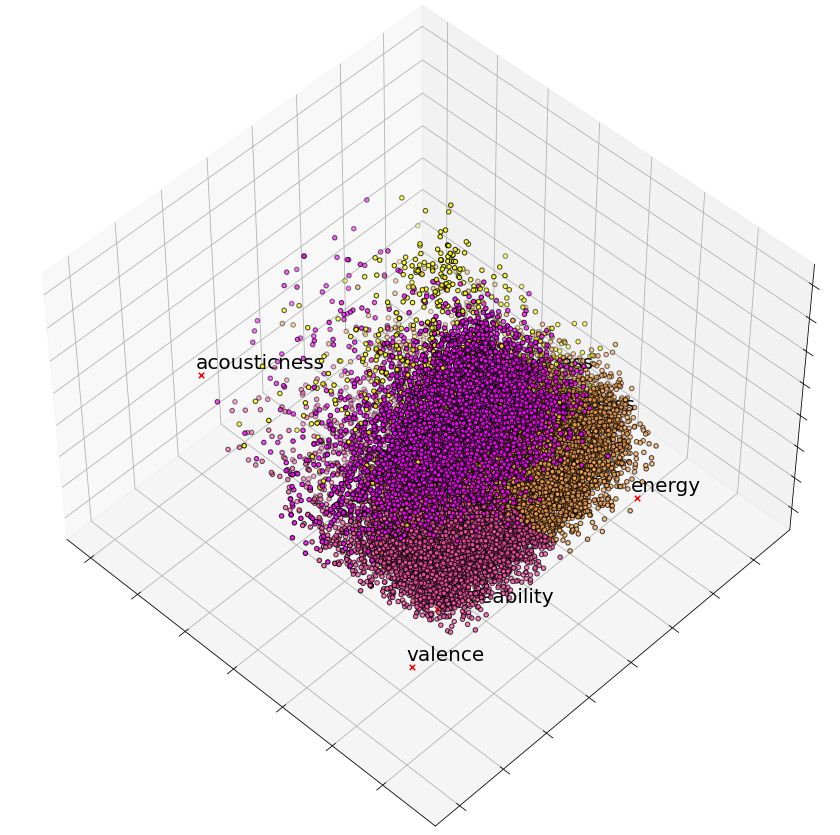

In [19]:
# %matplotlib widget
X = pca_data
y = label

fig = plt.figure(figsize=(12, 15))
# ax = Axes3D(fig, auto_add_to_figure=False)
plt.clf()

ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])

ax.scatter(
    data[:, 2], data[:, 1], data[:, 0], c=y, cmap="spring", edgecolor="k",
)

for i in range(len(music_features_list)):
    ax.scatter(
        pca_component1_np[i],
        pca_component2_np[i],
        pca_component3_np[i],
        marker="x",
        color="red",
        s=30,
        #         zorder=1,
    )
    ax.text(
        pca_component1_np[i] + 0.03,
        pca_component2_np[i] - 0.01,
        pca_component3_np[i] - 0.01,
        music_features_list[i],
        #         s="h1",
        fontsize=20,
        color="black",
        #         zorder=1,
    )


ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

# plt.legend()
plt.show()

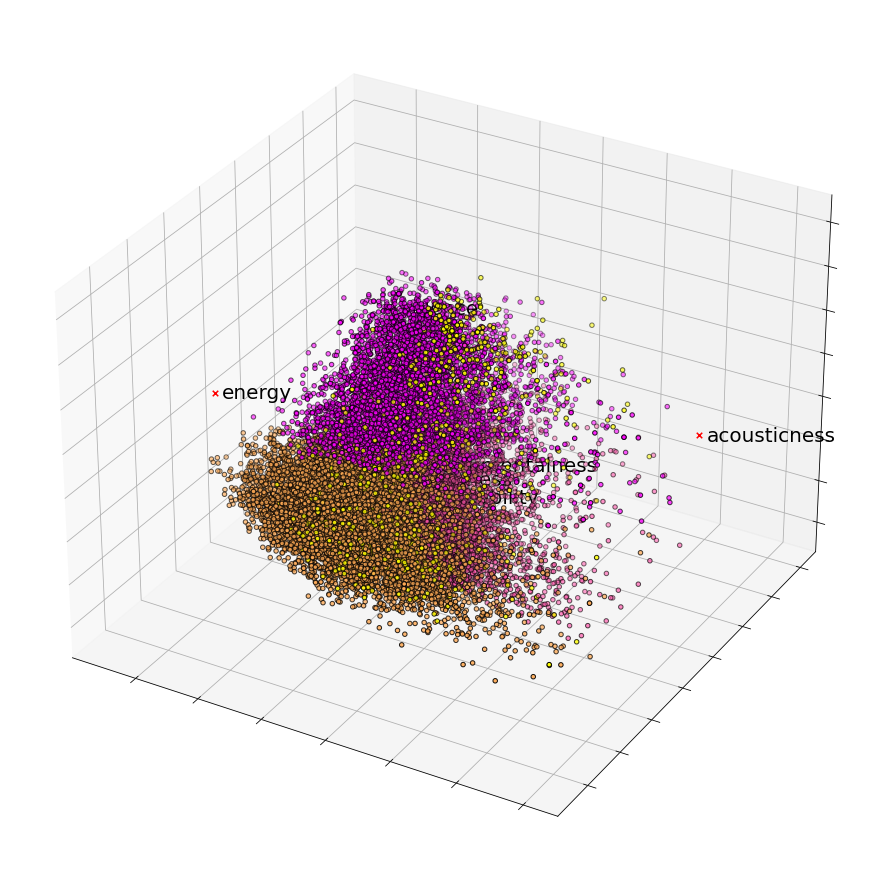

In [20]:
# %matplotlib widget
# %matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

X = pca_data
y = label

fig = plt.figure(figsize=(12, 15))
ax = Axes3D(fig, auto_add_to_figure=False)

# plt.clf()

# ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
# ax.set_position([0, 0, 0.95, 1])

# y = np.choose(y, [1, 2, 0]).astype(float)
fig.add_axes(ax)
ax.scatter(
    data[:, 2], data[:, 1], data[:, 0], c=y, cmap="spring", edgecolor="k",
)

for i in range(len(music_features_list)):
    ax.scatter(
        pca_component1_np[i],
        pca_component2_np[i],
        pca_component3_np[i],
        marker="x",
        color="red",
        s=30,
        #         zorder=1,
    )
    ax.text(
        pca_component1_np[i] + 0.03,
        pca_component2_np[i] - 0.01,
        pca_component3_np[i] - 0.01,
        music_features_list[i],
        #         s="h1",
        fontsize=20,
        color="black",
        #         zorder=1,
    )


ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

# plt.legend()
plt.show()

## Music features change with time

In [21]:
music_df["artist_name"].value_counts().index[:10]

Index(['Taylor Swift', 'The Weeknd', 'Drake', 'Lady Gaga', 'Lana Del Rey',
       'BTS', 'Rihanna', 'Justin Bieber', 'Beyoncé', 'Lil Wayne'],
      dtype='object')

In [22]:
top_10_artists = music_df["artist_name"].value_counts().index[:10]
top_10_artists

Index(['Taylor Swift', 'The Weeknd', 'Drake', 'Lady Gaga', 'Lana Del Rey',
       'BTS', 'Rihanna', 'Justin Bieber', 'Beyoncé', 'Lil Wayne'],
      dtype='object')

In [23]:
music_df["year"] = music_df["release_date"].dt.year

In [24]:
music_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23987 entries, 0 to 23999
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   artist_name       23987 non-null  object        
 1   track_name        23987 non-null  object        
 2   track_id          23987 non-null  object        
 3   popularity        23987 non-null  int64         
 4   release_date      23987 non-null  datetime64[ns]
 5   index             23987 non-null  int64         
 6   danceability      23987 non-null  float64       
 7   energy            23987 non-null  float64       
 8   key               23987 non-null  int64         
 9   loudness          23987 non-null  float64       
 10  mode              23987 non-null  int64         
 11  speechiness       23987 non-null  float64       
 12  acousticness      23987 non-null  float64       
 13  instrumentalness  23987 non-null  float64       
 14  liveness          2398

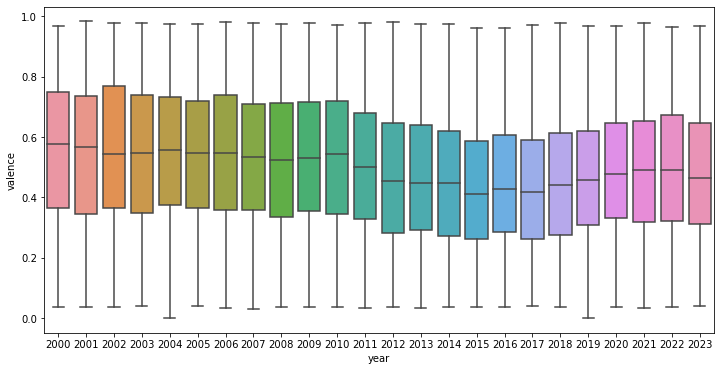

In [25]:
fig = plt.figure(1, figsize=(12, 6))
sns.boxplot(data=music_df, x="year", y="valence", dodge=False)
plt.show()


<AxesSubplot:xlabel='year', ylabel='energy'>

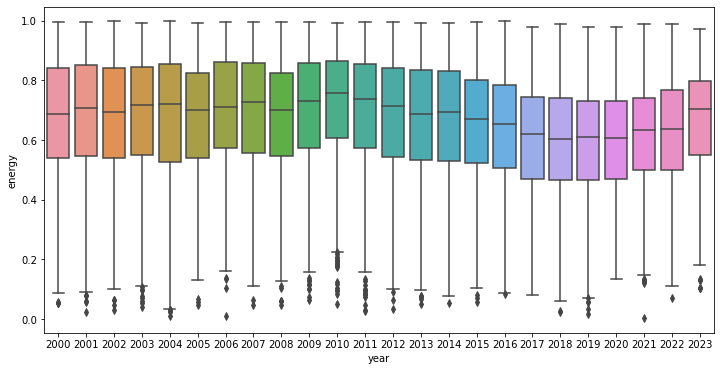

In [26]:
fig = plt.figure(1, figsize=(12, 6))
sns.boxplot(data=music_df, x="year", y="energy", dodge=False)

<Figure size 864x432 with 0 Axes>

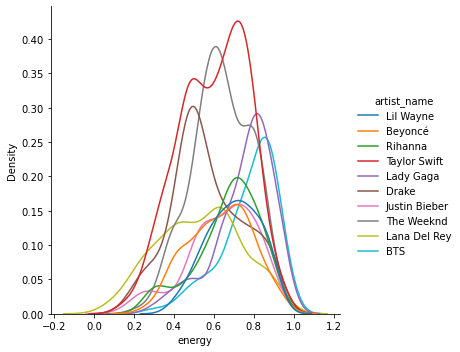

In [27]:
fig = plt.figure(1, figsize=(12, 6))
sns.displot(
    data=music_df[music_df["artist_name"].isin(top_10_artists)],
    x="energy",
    kind="kde",
    hue="artist_name",
)

# sns.displot(
#     data=music_df[(music_df["artist_name"] == "The Weeknd")], x="energy", kind="kde",
# )

## Correlation analysis

In [28]:
popularity_df = music_df[
    [
        "popularity",
        "danceability",
        "energy",
        "speechiness",
        "acousticness",
        "instrumentalness",
        "liveness",
        "valence",
    ]
]

In [29]:
corr = popularity_df.corr()

<AxesSubplot:>

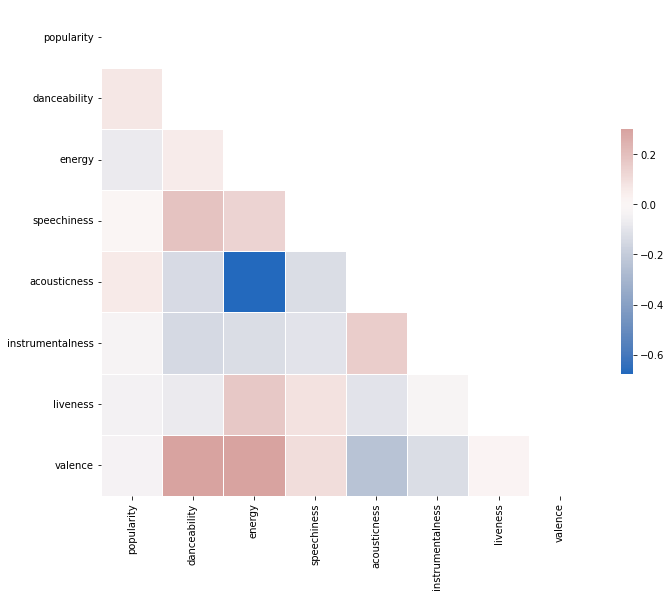

In [30]:
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr,
    mask=mask,
    cmap="vlag",
    vmax=0.3,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
)

In [ ]:
pca, k-means clustering, cosine similarity

# Recommender System

In [35]:
music_df[music_df['popularity']>50].sample(20)

,artist_name,track_name,track_id,popularity,release_date,index,danceability,energy,key,loudness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,year
16218,The Weeknd,All I Know,0NWqNXBJTpXbkI5rPWNy3p,63,2016-11-25,0,0.467,0.417,8,-10.614,...,0.171,120.021,audio_features,0NWqNXBJTpXbkI5rPWNy3p,spotify:track:0NWqNXBJTpXbkI5rPWNy3p,https://api.spotify.com/v1/tracks/0NWqNXBJTpXb...,https://api.spotify.com/v1/audio-analysis/0NWq...,321027,4,2016
15184,Little Mix,Love Me or Leave Me,1n73Qe6oEprLsUNHXET2pb,67,2015-11-06,0,0.437,0.351,6,-6.823,...,0.383,68.659,audio_features,1n73Qe6oEprLsUNHXET2pb,spotify:track:1n73Qe6oEprLsUNHXET2pb,https://api.spotify.com/v1/tracks/1n73Qe6oEprL...,https://api.spotify.com/v1/audio-analysis/1n73...,206494,4,2015
21595,Doja Cat,Payday (feat. Young Thug),2HolBGR6tpiWI80MXoV1dJ,61,2021-06-25,0,0.619,0.707,1,-5.791,...,0.558,168.995,audio_features,2HolBGR6tpiWI80MXoV1dJ,spotify:track:2HolBGR6tpiWI80MXoV1dJ,https://api.spotify.com/v1/tracks/2HolBGR6tpiW...,https://api.spotify.com/v1/audio-analysis/2Hol...,212947,4,2021
19941,Reik,Aleluya,23CsjGOYDQiJpX44BSn9TM,64,2019-05-31,0,0.810,0.716,8,-2.300,...,0.689,96.029,audio_features,23CsjGOYDQiJpX44BSn9TM,spotify:track:23CsjGOYDQiJpX44BSn9TM,https://api.spotify.com/v1/tracks/23CsjGOYDQiJ...,https://api.spotify.com/v1/audio-analysis/23Cs...,158480,4,2019
20281,Sam Hunt,Breaking Up Was Easy In The 90's,4sf2L157iEgAR7yrCNLgSq,61,2020-04-03,0,0.562,0.649,9,-5.400,...,0.376,145.913,audio_features,4sf2L157iEgAR7yrCNLgSq,spotify:track:4sf2L157iEgAR7yrCNLgSq,https://api.spotify.com/v1/tracks/4sf2L157iEgA...,https://api.spotify.com/v1/audio-analysis/4sf2...,215933,4,2020
16524,Vitamin String Quartet,Howl's Moving Castle - Merry-Go-Round of Life,20nMssNxX89e7YMoT0gpFQ,56,2016-02-19,0,0.258,0.179,2,-13.822,...,0.446,72.795,audio_features,20nMssNxX89e7YMoT0gpFQ,spotify:track:20nMssNxX89e7YMoT0gpFQ,https://api.spotify.com/v1/tracks/20nMssNxX89e...,https://api.spotify.com/v1/audio-analysis/20nM...,184875,3,2016
17610,Dua Lipa,Blow Your Mind (Mwah),2eAAEa8pxKF7My0EO4rFgR,62,2017-06-02,0,0.654,0.796,2,-4.761,...,0.491,108.854,audio_features,2eAAEa8pxKF7My0EO4rFgR,spotify:track:2eAAEa8pxKF7My0EO4rFgR,https://api.spotify.com/v1/tracks/2eAAEa8pxKF7...,https://api.spotify.com/v1/audio-analysis/2eAA...,178583,4,2017
17755,Yella Beezy,That's On Me,4nrg60oftaZJqgKvGd9eaB,51,2017-12-21,0,0.803,0.648,4,-9.185,...,0.538,131.923,audio_features,4nrg60oftaZJqgKvGd9eaB,spotify:track:4nrg60oftaZJqgKvGd9eaB,https://api.spotify.com/v1/tracks/4nrg60oftaZJ...,https://api.spotify.com/v1/audio-analysis/4nrg...,219552,4,2017
13329,Childish Gambino,II. Worldstar,0sutbJye3ZnRnzpOhlOaqL,52,2013-12-10,0,0.573,0.597,0,-9.684,...,0.224,119.828,audio_features,0sutbJye3ZnRnzpOhlOaqL,spotify:track:0sutbJye3ZnRnzpOhlOaqL,https://api.spotify.com/v1/tracks/0sutbJye3ZnR...,https://api.spotify.com/v1/audio-analysis/0sut...,244652,4,2013
13292,will.i.am,Feelin' Myself,26XUAwGZqQEyy8Ubhtj4kq,60,2013-01-01,0,0.859,0.533,6,-8.590,...,0.514,96.453,audio_features,26XUAwGZqQEyy8Ubhtj4kq,spotify:track:26XUAwGZqQEyy8Ubhtj4kq,https://api.spotify.com/v1/tracks/26XUAwGZqQEy...,https://api.spotify.com/v1/audio-analysis/26XU...,253547,4,2013


In [ ]:
# 0-focus 1-relax 2-workout 3-commute

In [36]:
label

array([2, 2, 1, ..., 0, 0, 1], dtype=int32)

In [37]:
user_selected_df = music_df[music_df['popularity']>50].sample(3)

In [100]:
user_selected_features_np = []
for i in user_selected_df.index:
    user_selected_features_np.append(music_features_np[i])
user_selected_features_mean_np = np.mean(np.stack(user_selected_features_np), axis=0)
user_selected_features_mean_np

array([-0.15841741, -0.79420609, -0.53331969, -0.05960719, -0.14258292,
       -0.42694404, -1.04093271])

<IPython.core.display.Javascript object>

In [101]:
user_context = input(
    "What context are you listening to music? 0-focus 1-relax 2-workout 3-commute"
)

What context are you listening to music? 0-focus 1-relax 2-workout 3-commute0


<IPython.core.display.Javascript object>

In [106]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_simi_dict = {}
for i in range(len(label)):
    if str(label[i]) == user_context:
        cosine_simi_dict[i] = cosine_similarity(
            user_selected_features_mean_np.reshape(1, -1),
            music_features_np[i].reshape(1, -1),
        )[0][0]

<IPython.core.display.Javascript object>

In [113]:
top_10_similar_list = sorted(
    cosine_simi_dict.items(), key=lambda x: x[1], reverse=True
)[:10]

<IPython.core.display.Javascript object>

In [115]:
recommend_index_list = []
for i in top_10_similar_list:
    recommend_index_list.append(i[0])
# the recommended playlist of 10 songs
music_df[music_df.index.isin(recommend_index_list)]

,artist_name,track_name,track_id,popularity,release_date,index,danceability,energy,key,loudness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,year
8151,Have A Nice Life,Bloodhail,5qZ4c1EBVWpmz1GBaks8Uq,58,2008-01-01,0,0.182,0.607,8,-9.543,...,0.410,75.562,audio_features,5qZ4c1EBVWpmz1GBaks8Uq,spotify:track:5qZ4c1EBVWpmz1GBaks8Uq,https://api.spotify.com/v1/tracks/5qZ4c1EBVWpm...,https://api.spotify.com/v1/audio-analysis/5qZ4...,338000,3,2008
8330,Lady Gaga,"Eh, Eh (Nothing Else I Can Say)",4CIu6ip0JlQeCqLLfoqlDW,47,2008-01-01,0,0.680,0.876,1,-3.646,...,0.816,187.785,audio_features,4CIu6ip0JlQeCqLLfoqlDW,spotify:track:4CIu6ip0JlQeCqLLfoqlDW,https://api.spotify.com/v1/tracks/4CIu6ip0JlQe...,https://api.spotify.com/v1/audio-analysis/4CIu...,175360,4,2008
8493,O.A.R.,This Town,5eeL8vKK5jxUIO9b7EQ871,42,2008-07-15,0,0.375,0.952,11,-4.189,...,0.612,174.036,audio_features,5eeL8vKK5jxUIO9b7EQ871,spotify:track:5eeL8vKK5jxUIO9b7EQ871,https://api.spotify.com/v1/tracks/5eeL8vKK5jxU...,https://api.spotify.com/v1/audio-analysis/5eeL...,215693,4,2008
10077,Kesha,Blow,3pYDZTJM2tVBUhIRifWVzI,66,2010-11-19,0,0.753,0.729,11,-3.862,...,0.812,120.013,audio_features,3pYDZTJM2tVBUhIRifWVzI,spotify:track:3pYDZTJM2tVBUhIRifWVzI,https://api.spotify.com/v1/tracks/3pYDZTJM2tVB...,https://api.spotify.com/v1/audio-analysis/3pYD...,219973,4,2010
13369,Ariana Grande,Right There,3yiopxxeHuwcpAg4e57Zjt,49,2013-01-01,0,0.621,0.834,7,-3.166,...,0.561,156.095,audio_features,3yiopxxeHuwcpAg4e57Zjt,spotify:track:3yiopxxeHuwcpAg4e57Zjt,https://api.spotify.com/v1/tracks/3yiopxxeHuwc...,https://api.spotify.com/v1/audio-analysis/3yio...,247080,4,2013
14764,Good Morning,Wednesday,6j9TclzIdlBwgFbOhbbQ0T,49,2014-11-14,0,0.594,0.443,6,-13.534,...,0.755,76.121,audio_features,6j9TclzIdlBwgFbOhbbQ0T,spotify:track:6j9TclzIdlBwgFbOhbbQ0T,https://api.spotify.com/v1/tracks/6j9TclzIdlBw...,https://api.spotify.com/v1/audio-analysis/6j9T...,143684,4,2014
14987,Jhené Aiko,Spotless Mind,5Xe4fAuhqxQRSjTWNZLSqJ,45,2014-09-08,0,0.473,0.455,9,-8.774,...,0.330,82.717,audio_features,5Xe4fAuhqxQRSjTWNZLSqJ,spotify:track:5Xe4fAuhqxQRSjTWNZLSqJ,https://api.spotify.com/v1/tracks/5Xe4fAuhqxQR...,https://api.spotify.com/v1/audio-analysis/5Xe4...,268973,4,2014
18426,bülow,You & Jennifer,0g21KZ1XJuhwexWPLpuEt1,59,2018-06-08,0,0.752,0.698,11,-6.530,...,0.347,132.058,audio_features,0g21KZ1XJuhwexWPLpuEt1,spotify:track:0g21KZ1XJuhwexWPLpuEt1,https://api.spotify.com/v1/tracks/0g21KZ1XJuhw...,https://api.spotify.com/v1/audio-analysis/0g21...,159453,4,2018
19511,Saweetie,My Type (feat. City Girls & Jhené Aiko) - Remix,5LTdRSQOg63EazLbKZbWn2,59,2019-08-23,0,0.925,0.904,2,-3.362,...,0.758,105.020,audio_features,5LTdRSQOg63EazLbKZbWn2,spotify:track:5LTdRSQOg63EazLbKZbWn2,https://api.spotify.com/v1/tracks/5LTdRSQOg63E...,https://api.spotify.com/v1/audio-analysis/5LTd...,172314,4,2019
19888,Doja Cat,Shine,5xIDCYGTyLaDkiaaulVPcJ,55,2019-11-07,0,0.559,0.630,11,-6.075,...,0.289,107.627,audio_features,5xIDCYGTyLaDkiaaulVPcJ,spotify:track:5xIDCYGTyLaDkiaaulVPcJ,https://api.spotify.com/v1/tracks/5xIDCYGTyLaD...,https://api.spotify.com/v1/audio-analysis/5xID...,160133,5,2019


<IPython.core.display.Javascript object>

In [125]:
from dash import Dash, html, dcc
import plotly.express as px
import pandas as pd

app = Dash(__name__)

# assume you have a "long-form" data frame
# see https://plotly.com/python/px-arguments/ for more options
df = pd.DataFrame({
    "Fruit": ["Apples", "Oranges", "Bananas", "Apples", "Oranges", "Bananas"],
    "Amount": [4, 1, 2, 2, 4, 5],
    "City": ["SF", "SF", "SF", "Montreal", "Montreal", "Montreal"]
})

fig = px.bar(df, x="Fruit", y="Amount", color="City", barmode="group")

app.layout = html.Div(children=[
    html.H1(children='Hello Dash'),

    html.Div(children='''
        Dash: A web application framework for your data.
    '''),

    dcc.Graph(
        id='example-graph',
        figure=fig
    )
])

if __name__ == '__main__':
    app.run_server(debug=True)


Dash is running on http://127.0.0.1:8050/



INFO:dash.dash:Dash is running on http://127.0.0.1:8050/



 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


Traceback (most recent call last):
  File "/Users/zhhang/opt/anaconda3/lib/python3.8/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/zhhang/opt/anaconda3/lib/python3.8/site-packages/traitlets/config/application.py", line 845, in launch_instance
    app.initialize(argv)
  File "/Users/zhhang/opt/anaconda3/lib/python3.8/site-packages/traitlets/config/application.py", line 88, in inner
    return method(app, *args, **kwargs)
  File "/Users/zhhang/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 632, in initialize
    self.init_sockets()
  File "/Users/zhhang/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 282, in init_sockets
    self.shell_port = self._bind_socket(self.shell_socket, self.shell_port)
  File "/Users/zhhang/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 229, in _bind_socket
    return self._try_bind_socket(s, port)
  File "/Users/zhhang/opt/anacond

SystemExit: 1

/Users/zhhang/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3449: UserWarning:

To exit: use 'exit', 'quit', or Ctrl-D.



<IPython.core.display.Javascript object>